In [1]:
import numpy as np

def load_data_training_and_test(datasetname):
    npzfile = np.load(datasetname + "_training_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_training_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']
    
    return (train,train_labels),(test, test_labels)

In [2]:
(x_train,y_train), (x_test,y_test) = load_data_training_and_test("cats_vs_dogs")

y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape) #1000 dogs and 1000 cats
print(y_train.shape)
print(x_test.shape) #500 dogs and 500 cats
print(y_test.shape)

(2000,)
(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


In [42]:
#PARÂMETROS VARIÁVEIS DO MODELO
batch_size = 1
epochs = 10
learning_rate = 0.001
input_shape = (x_train[0].shape[0],x_train[1].shape[0],3)
#PARÂMETROS VARIÁVEIS DO MODELO

In [49]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model

#CRIANDO MODELO COMPUTACIONAL
model = keras.Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

#model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))

#CRIANDO MODELO COMPUTACIONAL

In [50]:
#COMPILANDO O MODELO
#opt = keras.optimizers.RMSprop(learning_rate=learning_rate,decay=1e-6)

model.compile(loss = 'binary_crossentropy',
             optimizer='rmsprop',
             metrics = ['accuracy'])
#COMPILANDO O MODELO

In [ ]:
#TREINANDO O MODELO
#checkpoint = ModelCheckpoint("C:/Users/gabri/Curso_Visao_Computacional/CIFAR10/best_model.h5", monitor='val_acc', verbose=1,
    #save_best_only=True, mode='max', period=1)

history = model.fit(x_train,y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test,y_test),
            shuffle=True)
#TREINANDO O MODELO

Epoch 1/10
2000/2000 [==============================] - 94s 46ms/step - loss: 0.7994 - accuracy: 0.5255 - val_loss: 0.6694 - val_accuracy: 0.5930
Epoch 2/10
2000/2000 [==============================] - 91s 46ms/step - loss: 0.7758 - accuracy: 0.5905 - val_loss: 0.6426 - val_accuracy: 0.6520
Epoch 3/10
2000/2000 [==============================] - 91s 46ms/step - loss: 0.7543 - accuracy: 0.6315 - val_loss: 0.6587 - val_accuracy: 0.6360
Epoch 4/10
2000/2000 [==============================] - 93s 47ms/step - loss: 0.8538 - accuracy: 0.6435 - val_loss: 0.7538 - val_accuracy: 0.6530
Epoch 5/10
2000/2000 [==============================] - 99s 50ms/step - loss: 0.8076 - accuracy: 0.6660 - val_loss: 0.9715 - val_accuracy: 0.6470
Epoch 6/10
2000/2000 [==============================] - 98s 49ms/step - loss: 0.8460 - accuracy: 0.6835 - val_loss: 0.7597 - val_accuracy: 0.6230
Epoch 7/10
2000/2000 [==============================] - 91s 46ms/step - loss: 0.8937 - accuracy: 0.7185 - val_loss: 0.9480 -

In [48]:
#SALVANDO O MODELO
from os import listdir
from os.path import isfile, join
mypath = "./save_models/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath,f))]
contador = len(file_names)

path = "C:/Users/gabri/Curso_Visao_Computacional/cat_vc_dog/save_models/"
name_model = "cifar_model_" + str(contador)
model.save(path + name_model + ".h5")
#SALVANDO O MODELO

NameError: name 'training_images' is not defined

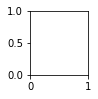

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(20,10))
for i in range(15):

    plt.subplot(3,5,i+1)
    random_num = np.random.randint(0,len(training_images))
    plt.imshow(training_images[random_num])
    
    if training_labels[random_num] == 0: text = "Cat"
    if training_labels[random_num] == 1: text = "Dog"
        
    plt.text(0,0,s=text,fontsize=30)